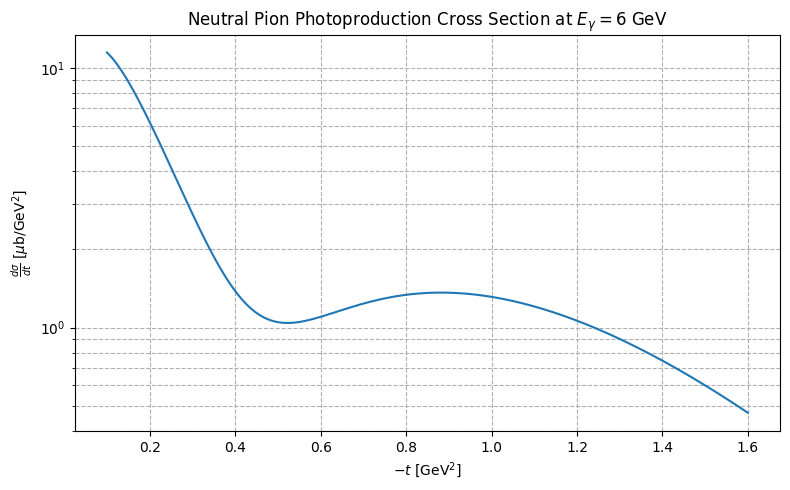

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Physical constants
M = 0.938  # Proton mass in GeV
m_pi = 0.135  # Neutral pion mass in GeV
s0 = 1.0  # Scale parameter in GeV^2
E_gamma_lab = 6.0  # Photon lab energy in GeV

# Mandelstam s
s = M**2 + 2 * M * E_gamma_lab

# Couplings and trajectory parameters from Mathieu et al. (2015)
g1 = 1.24
g4 = -6.68
g1c = -2.36
g4c = -4.26
g2 = -9.74

alpha_V0, alpha_Vp = 0.54, 1.34
alpha_A0, alpha_Ap = -0.22, 1.08
alpha_c0, alpha_cp = 0.43, 0.16

# Regge trajectories
def alpha_V(t): return alpha_V0 + alpha_Vp * t
def alpha_A(t): return alpha_A0 + alpha_Ap * t
def alpha_c(t): return alpha_c0 + alpha_cp * t

# Regge propagators
def R(s, t, alpha_func):
    a = alpha_func(t)
    return (np.pi / gamma(a)) * ((1 - np.exp(-1j * np.pi * a)) / (2 * np.sin(np.pi * a))) * (s / s0)**(a - 1)

def R_cut(s, t):
    a = alpha_c(t)
    return (1 / np.log(s / s0)) * ((np.pi / gamma(a)) * (1 - np.exp(-1j * np.pi * a)) / (2 * np.sin(np.pi * a))) * (s / s0)**(a - 1)

# Kinematics
def p_t(s):  # Final state CM momentum
    term1 = (s - (M + m_pi)**2)
    term2 = (s - (M - m_pi)**2)
    return np.sqrt(term1 * term2) / (2 * np.sqrt(s))

def k_t(s):  # Initial photon momentum in CM
    return (s - M**2) / (2 * np.sqrt(s))

def E_gamma_cm(s):
    return (s - M**2) / (2 * np.sqrt(s))

def cos_theta_t(s, t):
    num = 2 * s * (t - m_pi**2) + (s-M**2)*(s + m_pi**2 - M**2)
    denom = (s-M**2) * np.sqrt((s - (M + m_pi)**2) * (s - (M - m_pi)**2))
    return num / denom

def sin_theta_t_squared(cos_theta):
    return 1 - cos_theta**2

# Amplitudes
def F1(s, t): return (-g1 * t + 2 * M * g4) * R(s, t, alpha_V) + (-g1c * t + 2 * M * g4c) * R_cut(s, t)
def F2(s, t): return g2 * t * R(s, t, alpha_A)
def F3(s, t): return (2 * M * g1 - g4) * t * R(s, t, alpha_V) + (2 * M * g1c - g4c) * t * R_cut(s, t)

# Differential cross-section
# def dsigma_dt(s, t):
#     kt = k_t(s)
#     pt = p_t(s)
#     Egamma = (s - M**2) / (2*np.sqrt(s))
#     cos_theta = cos_theta_t(s, t)
#     sin2_theta = sin_theta_t_squared(cos_theta)
#     F1_val = F1(s, t)
#     F2_val = F2(s, t)
#     F3_val = F3(s, t)
#     term1 = 2 * sin2_theta * (np.abs(2 * pt * F2_val)**2 - t * np.abs(F1_val)**2)
#     term2 = (1 - cos_theta)**2 * np.abs(F3_val)**2
#     term3 = (1 + cos_theta)**2 * np.abs(F3_val)**2
#     prefactor = (1 / (64 * np.pi)) * (kt**2 / (4 * M**2 * Egamma**2))
#     return 389.4*prefactor * (term1 + term2 + term3)

def dsigma_dt(s,t):
    prefactor=1/(32*np.pi)
    first=(np.abs(F3(s,t))**2-t*np.abs(F1(s,t))**2)/(4*M**2-t)
    second=np.abs(F2(s,t))**2
    return 389.4*prefactor*(first+second)

def sigma_beam_asymmetry(s, t):
    first=(np.abs(F3(s,t))**2-t*np.abs(F1(s,t))**2)/(4*M**2-t)
    second=np.abs(F2(s,t))**2
    return (first-second)/(first+second)


# Compute cross-section over t range
t_vals = np.linspace(-1.6, -0.1, 300)
ds_dt_vals = np.array([dsigma_dt(s, t) for t in t_vals])*10

# Plot
plt.figure(figsize=(8, 5))
plt.plot(-t_vals, ds_dt_vals )  # Convert to μb/GeV^2
plt.yscale('log')
plt.xlabel(r"$-t$ [GeV$^2$]")
plt.ylabel(r"$\frac{d\sigma}{dt}$ [$\mu$b/GeV$^2$]")
# plt.ylim([0,0.4])
plt.title(r"Neutral Pion Photoproduction Cross Section at $E_\gamma = 6$ GeV")
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()


In [55]:
import numpy as np
import os
os.chdir('/home/oscar/Montecarlo-for-hadronic/')
import pandas as pd

paper=21

energy=4

path=f'{paper}/{energy}Gev.csv'
# Load into NumPy array
data = pd.read_csv(path)  # For space/tab-delimited data
# or for comma-delimited:
data = pd.read_csv(path)

print(data.shape)  # Check dimensions

(13, 6)


In [56]:
# plt.scatter(data['T [GEV**2]'],data['D(SIG)/DT [MUB/GEV**2]'])
def plot_exp(paper,energy,color):
    """
    Paper: number of Ref in og article
    Energy: Egamma for the process
    Color: color of scatter/error bars
    """
    path=f'{paper}/{energy}Gev.csv'
    # Load into NumPy array
    data = pd.read_csv(path)  # For space/tab-delimited data
    # or for comma-delimited:
    data = pd.read_csv(path)

    if paper==20:
        plt.errorbar(data['-T [GEV**2]'],1000*data['D(SIG)/DT [MB/GEV**2]'],yerr=[-data['error -'],data['error +']],fmt='o', color=color, markersize=4,
                capsize=8, capthick=1, label=r"Data from ref "+f"[{paper}]"+r" at $E_{\gamma}$="+f"{energy} GeV")

    elif paper==22 and energy==4 or energy==52:
        plt.errorbar(data['-T [GEV**2]'],data['D(SIG)/DT [NB/GEV**2]']/1000,yerr=[-data['error -']/1000,data['error +']/1000],fmt='o', color=color, markersize=4,
                capsize=8, capthick=1, label=r"Data from ref "+f"[{paper}]"+r" at $E_{\gamma}$="+f"{energy} GeV")

    else:
        plt.errorbar(-data['T [GEV**2]'],data['D(SIG)/DT [MUB/GEV**2]'],yerr=[-data['error -'],data['error +']],fmt='o', color=color, markersize=4,
                capsize=8, capthick=1, label=r"Data from ref "+f"[{paper}]"+r" at $E_{\gamma}$="+f"{energy} GeV")


def plot_import(papers,energy,colors,K,tmin):
    """
    Paper: number of Ref in og article
    Energy: Egamma for the process
    Color: color of scatter/error bars
    K: s dependant scaling "constant" I made the fuck up
    tmin: minimum t (aka max -t) i want the graph to go to
    """
    for i,paper in enumerate(papers):
        plot_exp(paper,energy,colors[i])
    E_gamma_lab=energy
    s = M**2 + 2 * M * E_gamma_lab
    t_vals = np.linspace(-tmin, -0.1, 300)
    ds_dt_vals = np.array([dsigma_dt(s, t) for t in t_vals])*K
    plt.plot(-t_vals, ds_dt_vals,label="Theoretical Regge cross section")  # Convert to μb/GeV^2
    plt.xlabel(r"$-t$ [GeV$^2$]")
    plt.ylabel(r"$\frac{d\sigma}{dt}$ [$\mu$b/GeV$^2$]")
    plt.yscale('log')
    plt.legend()
    # plt.show()

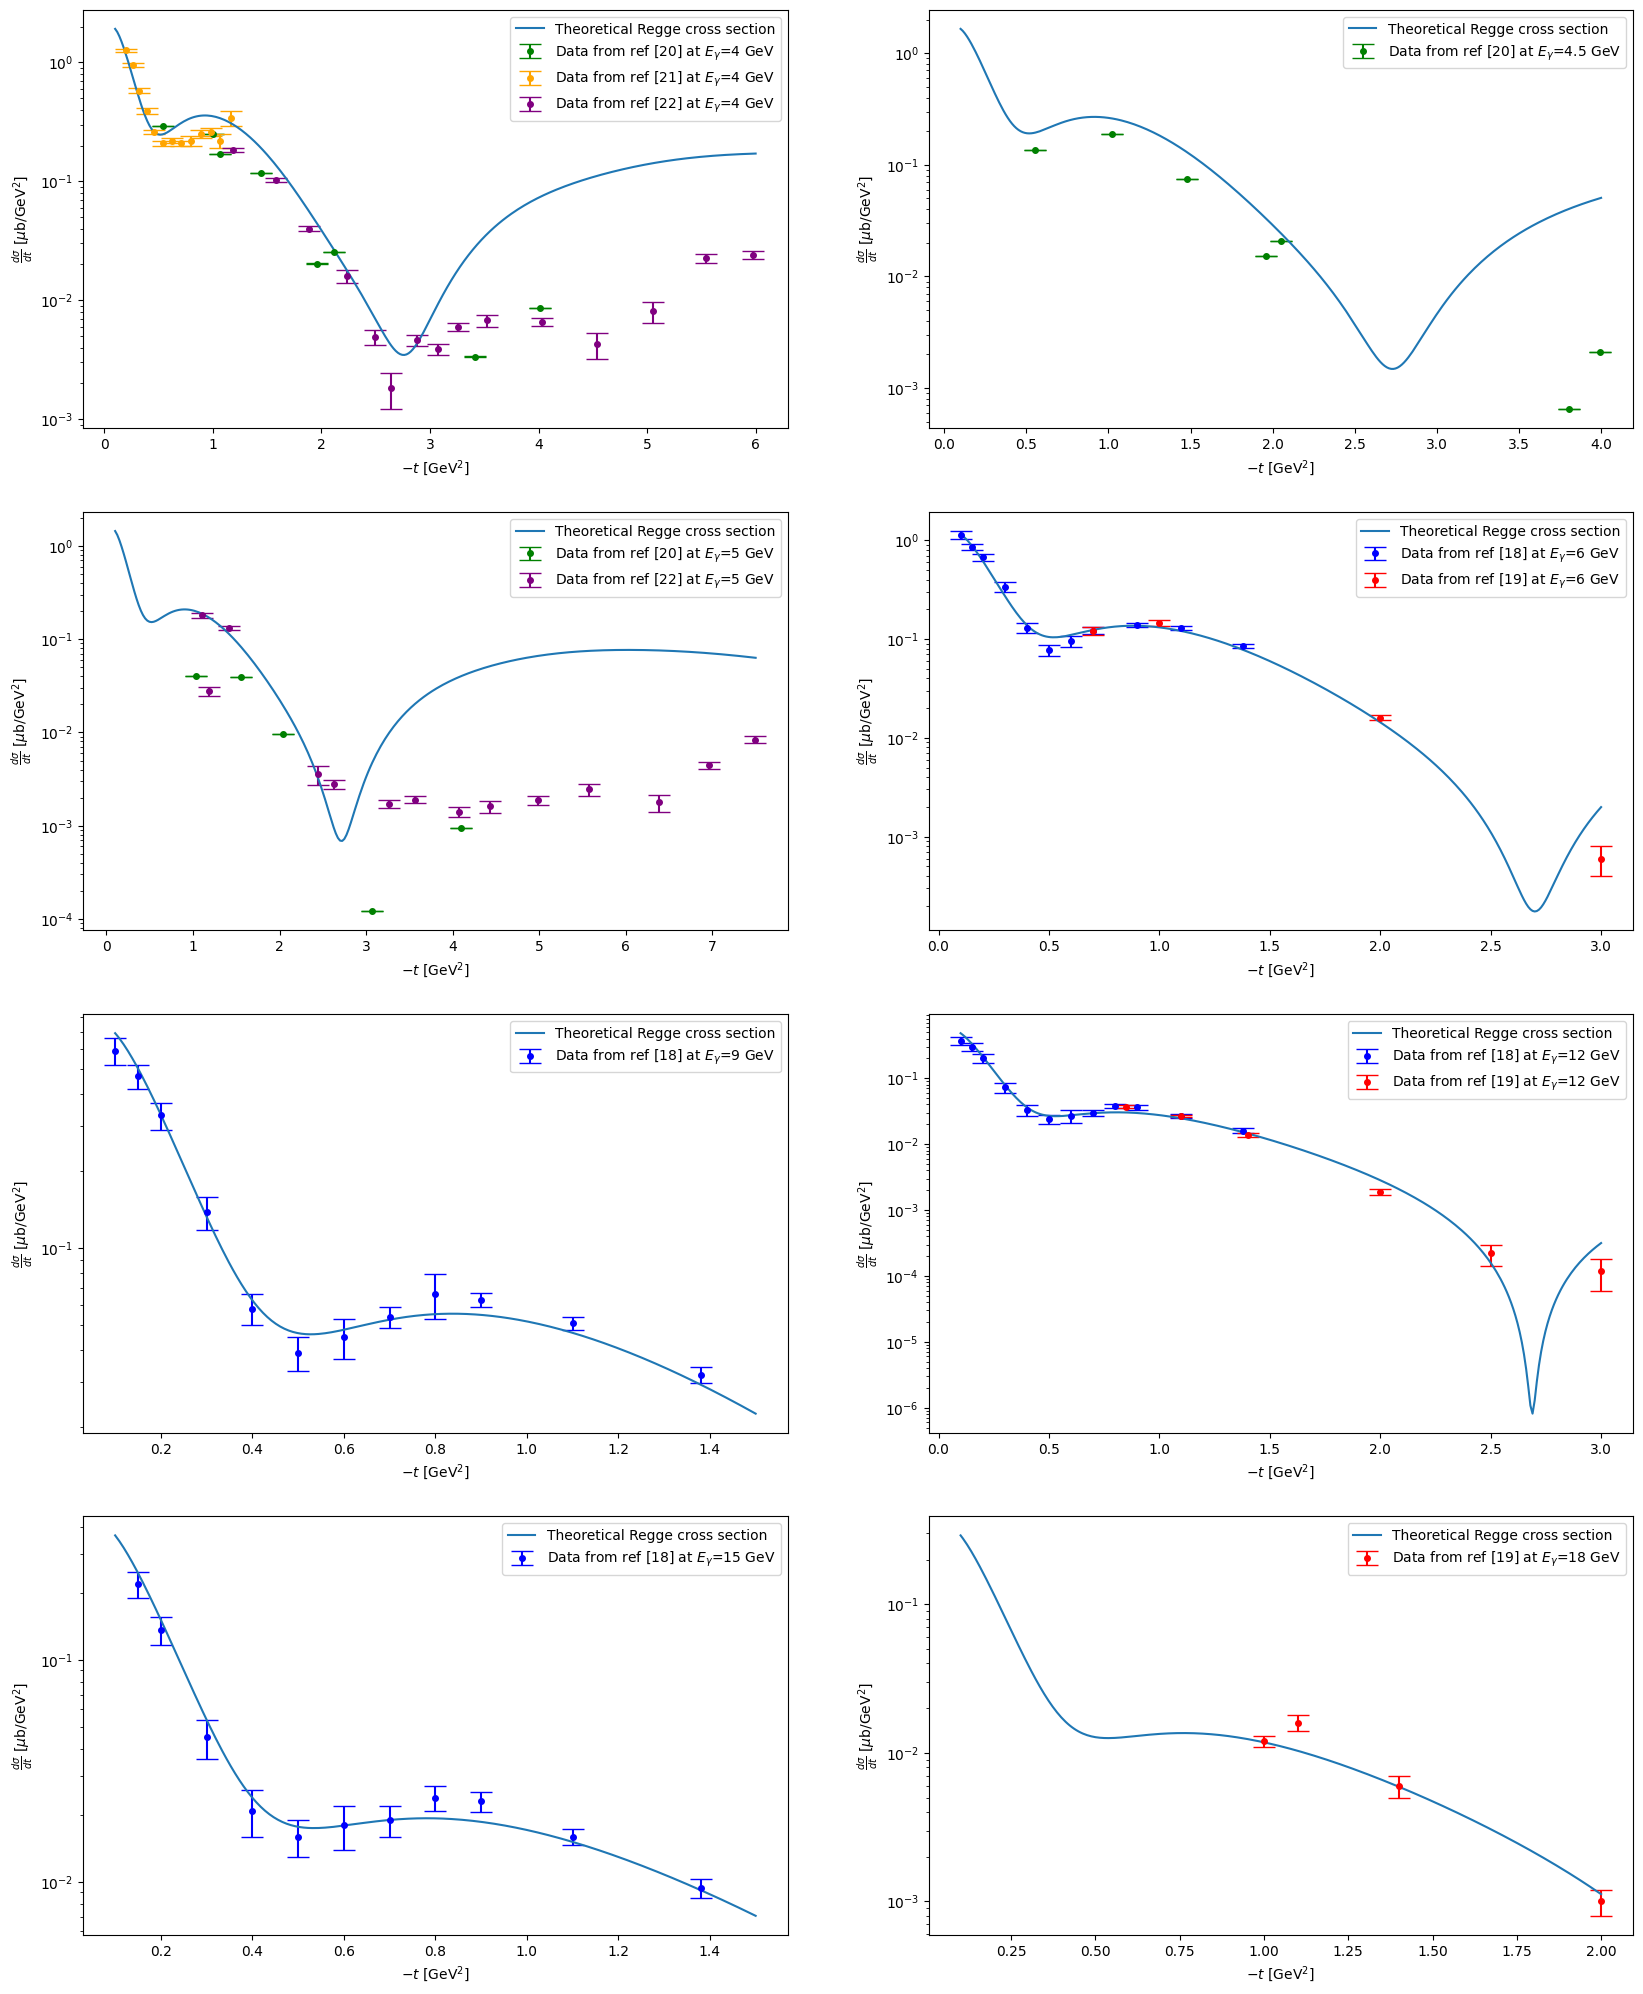

In [57]:
plt.figure(figsize=(20,25))  # Overall figure size

"""
PLOT 1!!
"""
plt.subplot(4,2, 1)

plot_import([20,21,22],4,['green','orange','purple'],1,6)
# plot_import([20,21,22],4,['green','orange','purple'],1.5,6)
"""
PLOT 2!!
"""
plt.subplot(4,2, 2)

plot_import([20],4.5,['green'],1,4)
# plot_import([20],4.5,['green'],1,4)
"""
PLOT 3!!
"""
plt.subplot(4,2,3)

plot_import([20,22],5,['green','purple'],1,7.5)
# plot_import([20,22],5,['green','purple'],1.5,7)
"""
PLOT 4!!
"""
plt.subplot(4,2,4)

plot_import([18,19],6,['blue','red'],1,3)
# plot_import([18,19],6,['blue','red'],2,3)
"""
PLOT 5!!
"""
K=4
plt.subplot(4,2,5)

plot_import([18],9,['blue'],1,1.5)
# plot_import([18],9,['blue'],4,3)
"""
PLOT 6!!
"""
plt.subplot(4,2,6)

plot_import([18,19],12,['blue','red'],1,3)
# plot_import([18,19],12,['blue','red'],5,3)

"""
PLOT 7!!
"""
plt.subplot(4,2,7)

plot_import([18],15,['blue'],1,1.5)
# plot_import([18],15,['blue'],5,3)

"""
PLOT 7!!
"""
plt.subplot(4,2,8)
plot_import([19],18,['red'],1,2)
# plot_import([19],18,['red'],6,3)


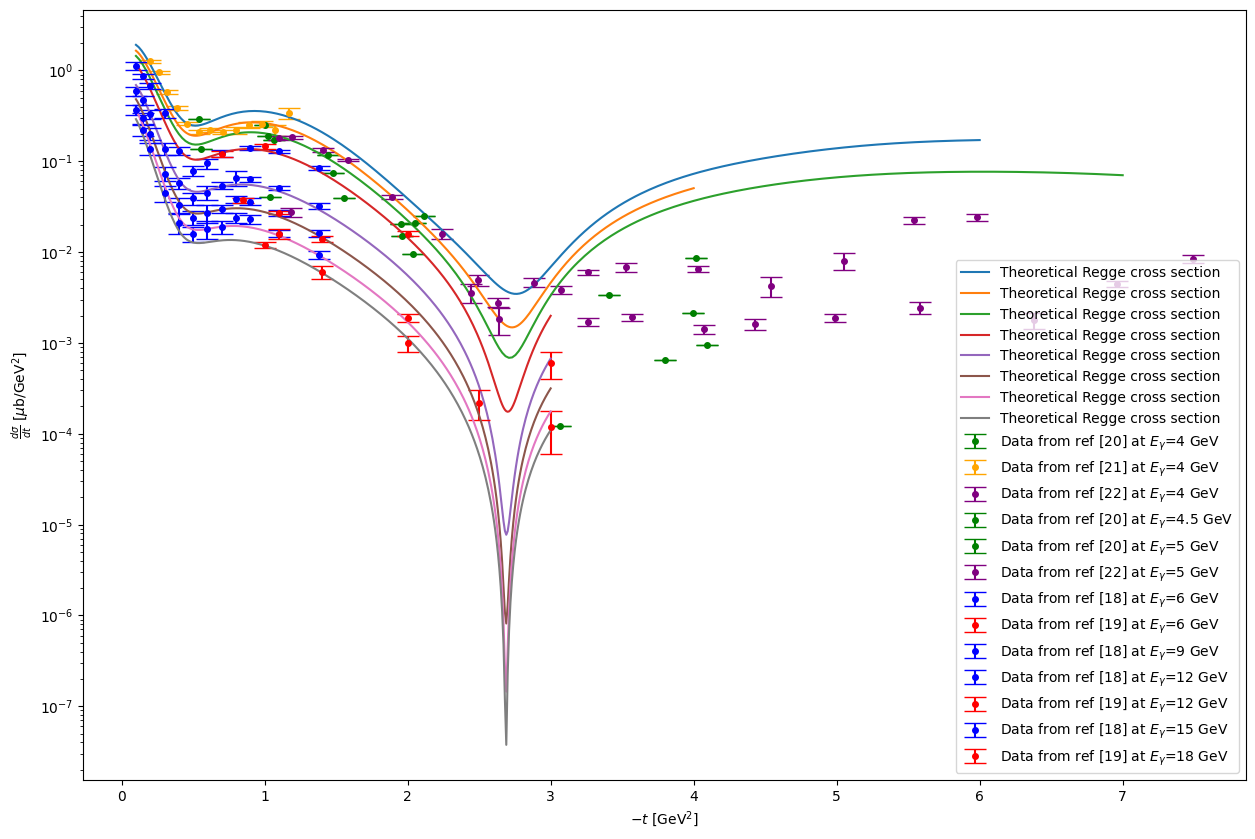

In [58]:
'''
All plots in one-->Very messy
'''
plt.figure(figsize=(15,10))

# plot_import([20,21,22],4,['green','orange','purple'],1,6)
plot_import([20,21,22],4,['green','orange','purple'],1,6)

# plot_import([20],4.5,['green'],1,4)
plot_import([20],4.5,['green'],1,4)

# plot_import([20,22],5,['green','purple'],2,7)
plot_import([20,22],5,['green','purple'],1,7)

# plot_import([18,19],6,['blue','red'],3,3)
plot_import([18,19],6,['blue','red'],1,3)

# plot_import([18],9,['blue'],1,3)
plot_import([18],9,['blue'],1,3)

# plot_import([18,19],12,['blue','red'],4,3)
plot_import([18,19],12,['blue','red'],1,3)

# plot_import([18],15,['blue'],5,3)
plot_import([18],15,['blue'],1,3)

# plot_import([19],18,['red'],6,3)
plot_import([19],18,['red'],1,3)

plt.show()

In [59]:
def E(s):
    return (s**2-0.938)/(2*0.938)

In [60]:
s=4.432
E(s)

9.970481876332627

In [61]:
def plot_pol(energy,color,tmin):
    """
    energy: Egamma for the process
    color: color of scatter/error bars
    tmin: minimum t (aka max -t) i want the graph to go to
    """
    path=f'Pol/{energy}Gev.csv'
    # Load into NumPy array
    data = pd.read_csv(path)  # For space/tab-delimited data
    # or for comma-delimited:
    data = pd.read_csv(path)

    plt.errorbar(-data['T [GEV**2]'],data['POL(NAME=PHOTON)'],yerr=[-data['error -'],data['error +']],fmt='o', color=color, markersize=4,
                capsize=8, capthick=1, label=r"Data from ref "+f"[18]"+r" at $E_{\gamma}$="+f"{energy} GeV")

    E_gamma_lab=energy
    
    s = M**2 + 2 * M * E_gamma_lab
    t_vals = np.linspace(-tmin, -0.1, 300)
    ds_dt_vals = np.array([sigma_beam_asymmetry(s,t) for t in t_vals])
    plt.plot(-t_vals, ds_dt_vals,label=f"Theoretical asymmetry at {energy} GeV",color=color)  # Convert to μb/GeV^2
    plt.xlabel(r"$-t$ [GeV$^2$]")
    plt.ylabel(r"$Sigma$")
    # plt.yscale('log')
    plt.legend()



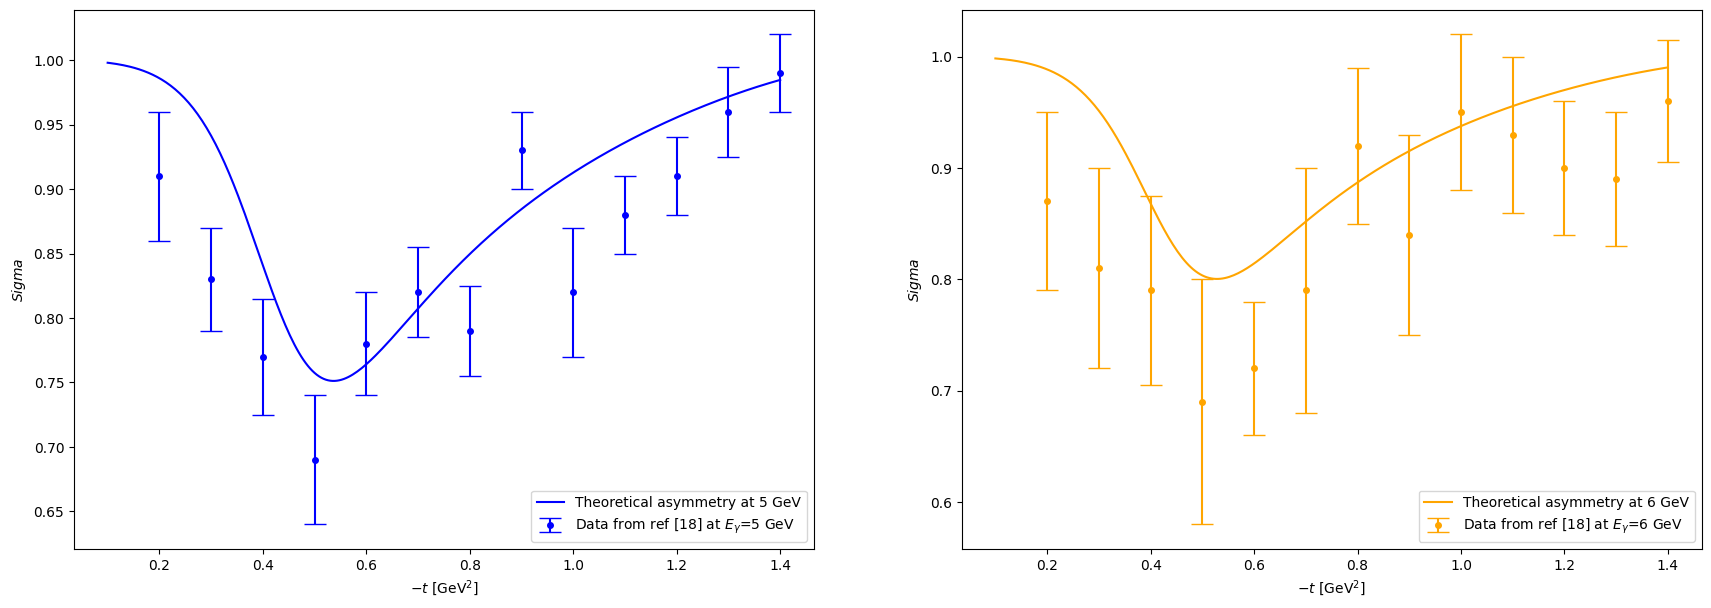

In [62]:
plt.figure(figsize=(21,7))  # Overall figure size

"""
PLOT 1!!
"""
plt.subplot(1,2, 1)

plot_pol(5,'blue',1.4)

plt.subplot(1,2, 2)
plot_pol(6,'orange',1.4)

# plt.subplot(1,2, 2)

# plot_pol(10,'green',1.4)

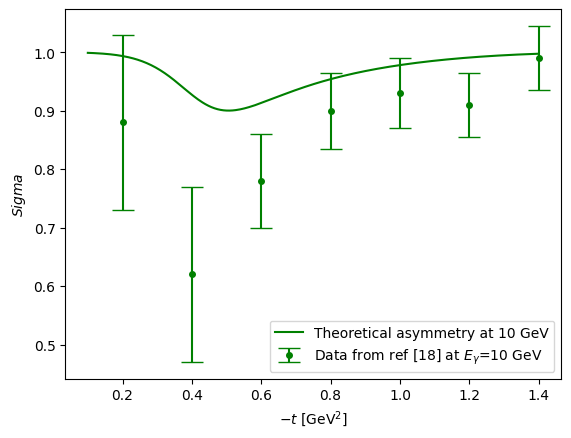

In [63]:
# plt.figure(figsize=(10,7))
plot_pol(10,'green',1.4)


In [78]:
s = M**2 + 2 * M * 4
cos_theta_t(s,-1.35)

np.float64(0.5967964232664936)